In [1]:
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
old = np.array([20.8, 2.8, 50, 33.3, 29.4, 38.9, 29.4, 52.6, 14.3])
young=np.array([45.5, 55, 60.7, 61.5, 61.1, 65.5, 42.9, 37.5])

In [3]:
stats.normaltest(old), stats.normaltest(young)
# H0 = sets randomly sampled from populations with identical means
# same variance and from a normal distribution (large P values --> cannot reject H0)

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


(NormaltestResult(statistic=0.10954414579072048, pvalue=0.9467009021600232),
 NormaltestResult(statistic=1.74534981122529, pvalue=0.41783239088593094))

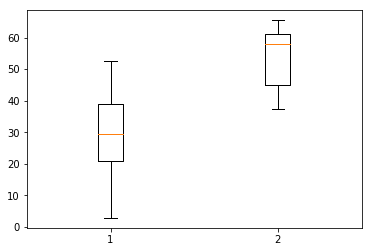

In [4]:
plt.boxplot([old, young]);

In [5]:
print(ttest_ind(old, young).pvalue)

0.0030218492023012695


In [6]:
stats.describe(old)

DescribeResult(nobs=9, minmax=(2.8, 52.6), mean=30.16666666666667, variance=259.0375, skewness=-0.17569385392311104, kurtosis=-0.8080848898945967)

In [7]:
stats.describe(young)

DescribeResult(nobs=8, minmax=(37.5, 65.5), mean=53.7125, variance=107.4069642857143, skewness=-0.4421628669270582, kurtosis=-1.3632352105713499)

In [8]:
F_ratio = (np.std(old, ddof=1) / np.std(young, ddof=1))**2
print(f"F ratio = {F_ratio:5.3f}")

F ratio = 2.412


In [31]:
mean_diff = np.mean(young) - np.mean(old)
print(f"mean difference= {mean_diff:5.2f}")

mean difference= 23.55


$$
SEM\substack{mean\_diff} = \sqrt{SEM²_a + SEM²_b}
$$

In [9]:
SEM_mean_diff = np.sqrt(stats.sem(old)**2 + stats.sem(young)**2)

In [11]:
t_ratio = mean_diff / SEM_mean_diff
print(f"t ratio = {t_ratio:4.2f}")

t ratio = 3.62


In [12]:
df = len(old) + len(young) - 2
t_ = stats.t(df=df).ppf((1+.95)/2) # two-tailed
CI_diff_mean = (mean_diff - t_*SEM_mean_diff, mean_diff + t_*SEM_mean_diff)

In [13]:
print(f"CI of the mean difference = {CI_diff_mean}")

CI of the mean difference = (9.6983295715685, 37.393337095098154)


##### Computing CI and P value with bootstraping

In [22]:
bs_old = np.array([np.mean(np.random.choice(old, size=len(old))) for _ in range(10000)])
bs_young= np.array([np.mean(np.random.choice(young,size=len(young))) for _ in range(10000)])

In [28]:
bs_mean_diff = bs_young - bs_old

In [29]:
CI_mean_diff_bs = np.percentile(bs_mean_diff, [2.5, 97.5])
print(f"mean difference using bootstraping = {np.mean(bs_mean_diff):5.2f}")
print(f"CI of the mean difference using bootstraping = {CI_mean_diff_bs}")

mean difference using bootstraping = 23.61
CI of the mean difference using bootstraping = [11.57413194 35.66055556]


In [33]:
# now we test the H0 hypothesis that both sets comes from the same population, same mean
combined_mean = np.mean(np.concatenate([old, young]))

In [35]:
young_shifted = young - np.mean(young) + combined_mean
old_shifted = old - np.mean(old) + combined_mean

In [67]:
bs_shifted_old = np.array([np.mean(np.random.choice(
    old_shifted, size=len(old))) for _ in range(10000)])
bs_shifted_young = np.array([np.mean(np.random.choice(
    young_shifted, size=len(old))) for _ in range(10000)])
bs_diff_shifted = bs_shifted_young - bs_shifter_old

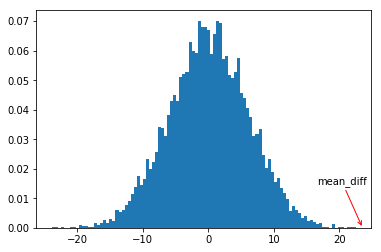

In [72]:
plt.hist(bs_diff_shifted, density=True, bins=100)
#plt.vlines(mean_diff, 0, .01, color='red', linestyles='--')
plt.annotate('mean_diff', xy=(mean_diff, 0), xytext=(mean_diff-7, .015),
            arrowprops={'arrowstyle': '->', 'color': 'red'});

In [73]:
P_value_bs = np.sum(bs_diff_shifted >= mean_diff) / len(bs_diff_shifted)
print(f"P value obtained using bootstraping = {P_value_bs:7.6f}")

P value obtained using bootstraping = 0.000000
